In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Loading data

In [2]:
data=pd.read_csv('/content/data.csv')

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.dropna(inplace=True)

In [5]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
#Converting categorical variables using OneHotEncoding
categorical_features = ['street', 'city', 'statezip', 'country']
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


Correlation Matrix

In [7]:
corr_matrix = data[numerical_features].corr().abs()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Heatmap of correlation of features

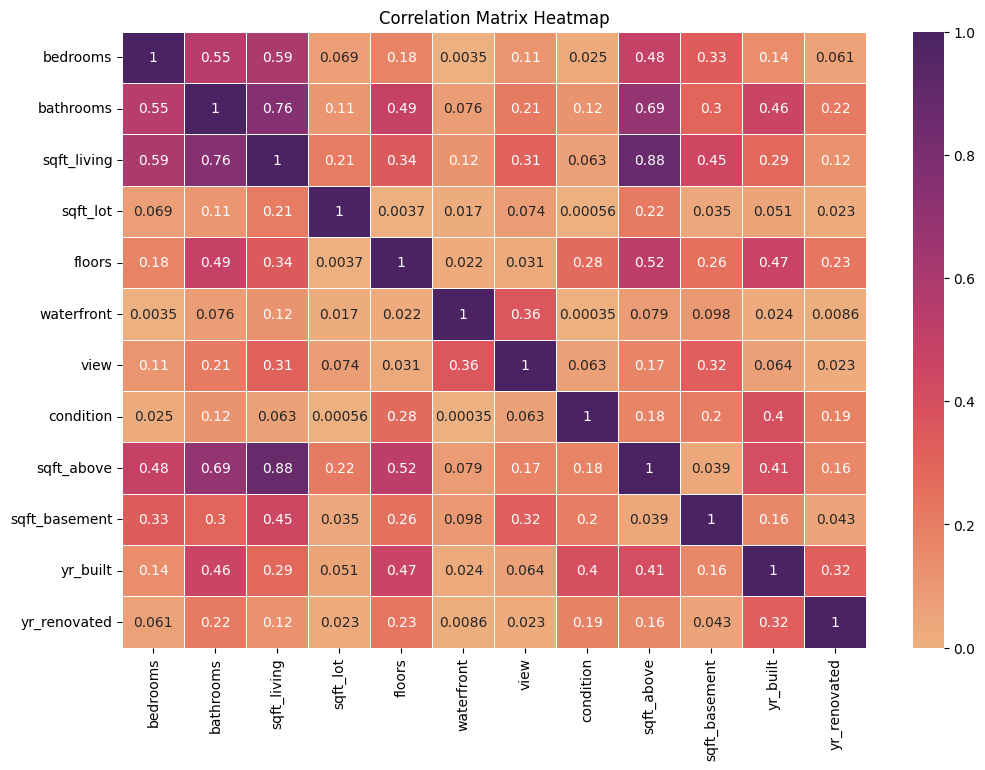

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', vmin=0, vmax=1, linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix Heatmap')
plt.show()

Dropping highly correlated columns

In [10]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]


In [11]:
numerical_features = [feature for feature in numerical_features if feature not in to_drop]

In [12]:
print(f"Columns dropped due to high correlation: {to_drop}")

Columns dropped due to high correlation: []


In [13]:
#handling outliers: Cap the price at the 99th percentile
price_cap = data['price'].quantile(0.99)
data = data[data['price'] <= price_cap]

# Preprocessing and Linear regression model

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [16]:
X = data[numerical_features + categorical_features]
y = data['price']

Splitting data to test and train and training the model

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['street', 'city', 'statezip',
                                                   'country'])])),
                ('regressor', LinearRegression())])

Predictions

In [18]:
y_pred = model.predict(X_test)

Evaluation

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Squared Error: 67857961332.13774
Root Mean Squared Error: 260495.60712637313
Mean Absolute Error: 134995.34193823818
R² Score: 0.2306646728832934


# Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
#handling outliers: Cap the price at the 99th percentile
price_cap = data['price'].quantile(0.99)
data = data[data['price'] <= price_cap]

In [22]:
#using Random Forest Regressor for a more complex model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])



In [23]:
#selecting features and target variable
X = data[numerical_features + categorical_features]
y = data['price']



In [24]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
#training the model
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['street', 'city', 'statezip',
                                                   'country'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [26]:
#making predictions
y_pred = model.predict(X_test)



In [27]:
#evaluating the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Squared Error: 25986744251.237865
Root Mean Squared Error: 161204.04539352562
Mean Absolute Error: 98980.19006241679
R² Score: 0.653889371107732


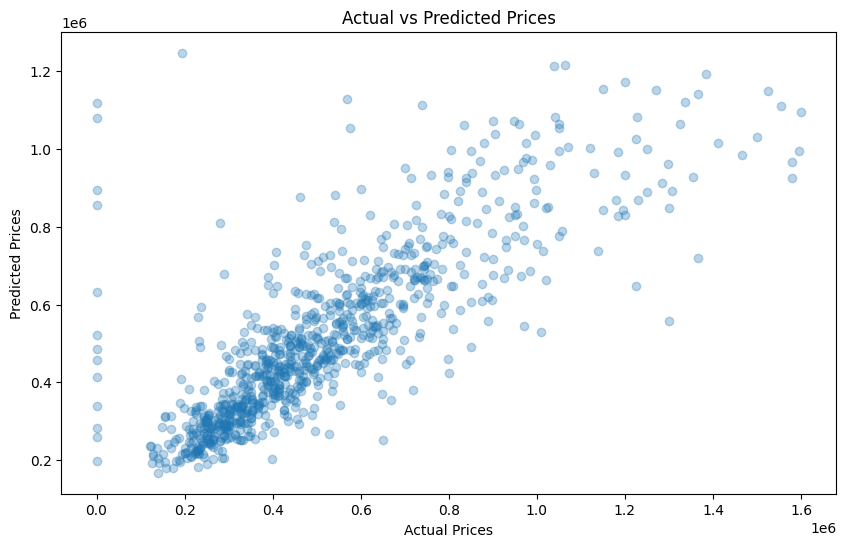

In [28]:
#plotting predicted vs real prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Gradient Boosting Regressor

In [29]:
#handling outliers: Cap the price at the 99th percentile
price_cap = data['price'].quantile(0.99)
data = data[data['price'] <= price_cap]

In [30]:
#converting categorical variables using OneHotEncoding
categorical_features = ['street', 'city', 'statezip', 'country']
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

In [31]:
#calculating the correlation matrix
corr_matrix = data[numerical_features].corr().abs()

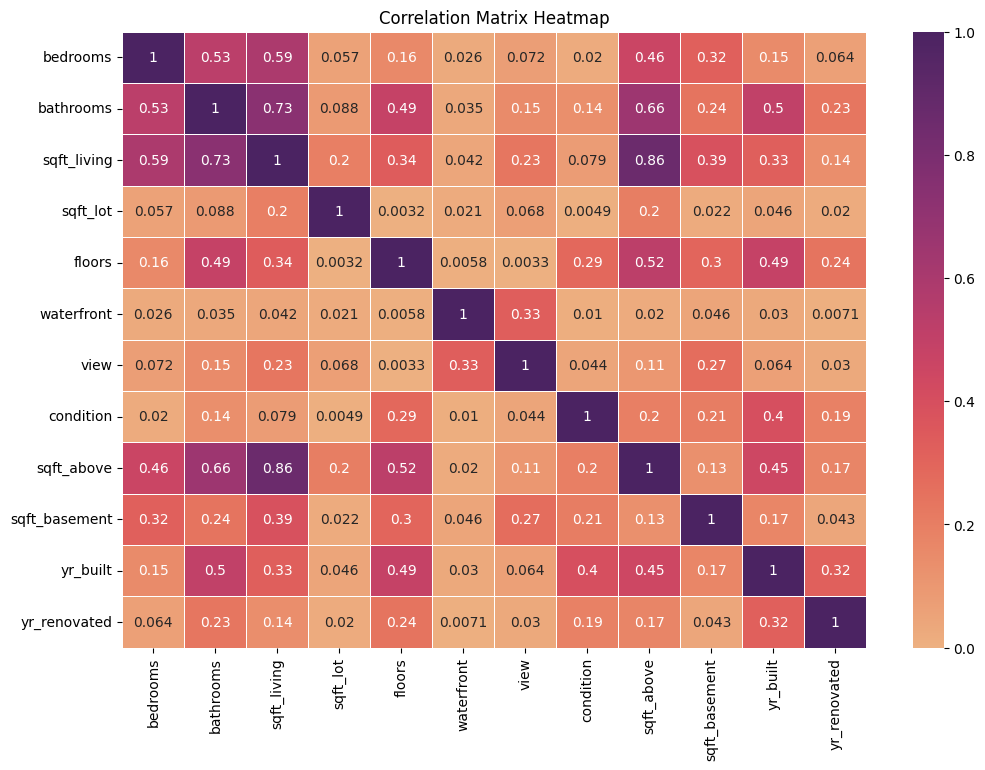

In [32]:
#visualizing the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', vmin=0, vmax=1, linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
#selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [34]:
#finding features with correlation greater than a threshold
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [35]:
#dropping highly correlated features
numerical_features = [feature for feature in numerical_features if feature not in to_drop]
print(f"Columns dropped due to high correlation: {to_drop}")

Columns dropped due to high correlation: ['sqft_above']


In [36]:
#defining the preprocessor and model
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [37]:
#using Gradient Boosting Regressor for a more complex model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

In [38]:
#selecting features and target variable
X = data[numerical_features + categorical_features]
y = data['price']

In [39]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#training the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['street', 'city', 'statezip',
                                                   'country'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [41]:
#making predictions
y_pred = model.predict(X_test)

In [42]:
#evaluating the model with additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Squared Error: 23690472188.693172
Root Mean Squared Error: 153917.0951801429
Mean Absolute Error: 101949.58427483664
R² Score: 0.5993864621130276


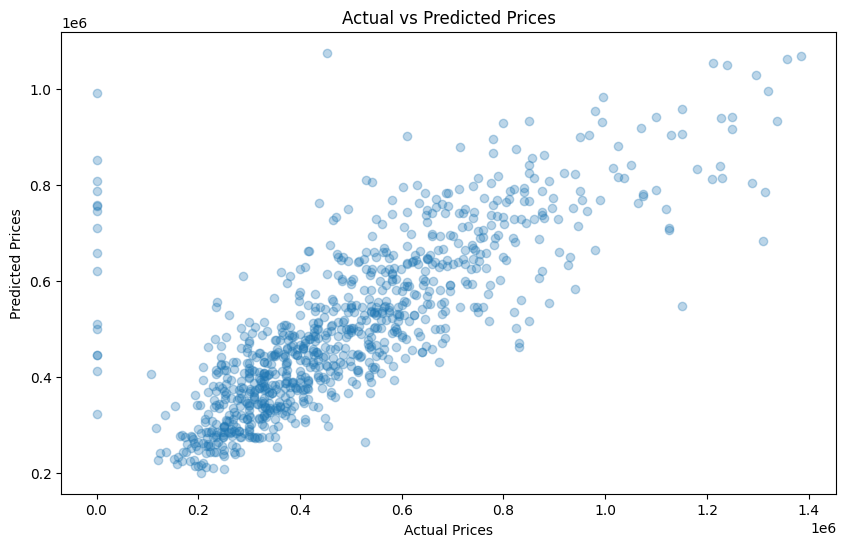

In [43]:
#plotting predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
#preprocessing and model
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [46]:
X = data[numerical_features + categorical_features]
y = data['price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#training the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['street', 'city', 'statezip',
                                                   'country'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [49]:
#making predictions
y_pred = model.predict(X_test)

Evaluation

In [50]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Squared Error: 21623385615.134373
Root Mean Squared Error: 147048.922522861
Mean Absolute Error: 90654.16788244234
R² Score: 0.6343415638415308


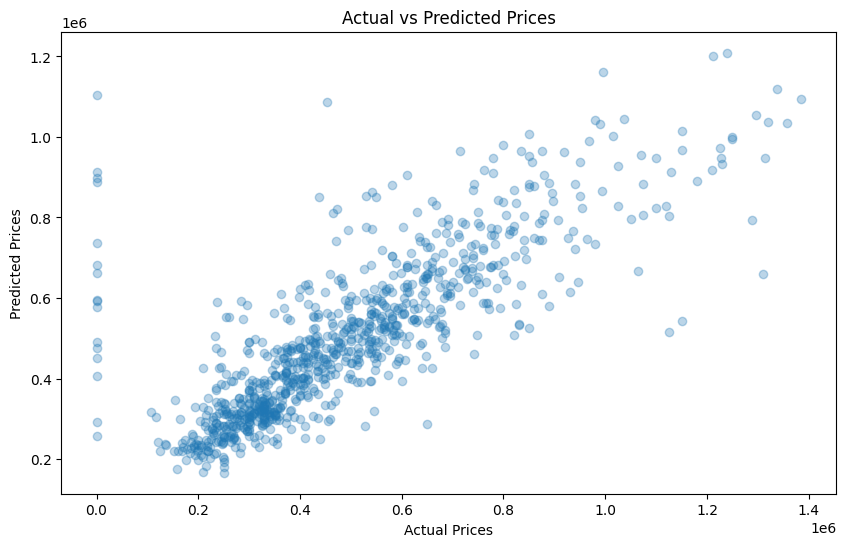

In [51]:
#plotting predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()